## Model Building

In [16]:
import yfinance as yf

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [12]:
raw_data = pd.read_csv("Trady Flow - Best Options Trade Ideas.csv")
pd.options.display.max_columns = None
raw_data.head()

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,Call,10/21/2022,10.0,9.54,5.05,7,360,183.60K,4.07K,4.71,0
1,6/17/2022 15:05,CVNA,Call,1/19/2024,60.0,23.52,4.60,7,634,310.66K,130,155.05,0
2,6/17/2022 14:51,PTLO,Put,2/17/2023,15.0,15.19,3.50,7,800,281.00K,0,1.39,0
3,6/17/2022 14:39,TWLO,Call,6/24/2022,86.0,84.51,2.95,5,722,198.80K,436,2.48,0
4,6/17/2022 13:56,ATUS,Put,9/16/2022,7.0,8.62,0.68,5,6.27K,501.84K,8.63K,23.13,0


In [27]:
raw_data['Date'] = pd.to_datetime(raw_data['Time']).dt.date

In [30]:
raw_data.head()

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM,Date
0,6/17/2022 15:07,ISEE,Call,10/21/2022,10.0,9.54,5.05,7,360,183.60K,4.07K,4.71,0,2022-06-17
1,6/17/2022 15:05,CVNA,Call,1/19/2024,60.0,23.52,4.60,7,634,310.66K,130,155.05,0,2022-06-17
2,6/17/2022 14:51,PTLO,Put,2/17/2023,15.0,15.19,3.50,7,800,281.00K,0,1.39,0,2022-06-17
3,6/17/2022 14:39,TWLO,Call,6/24/2022,86.0,84.51,2.95,5,722,198.80K,436,2.48,0,2022-06-17
4,6/17/2022 13:56,ATUS,Put,9/16/2022,7.0,8.62,0.68,5,6.27K,501.84K,8.63K,23.13,0,2022-06-17


In [31]:
raw_data.set_index('Date', inplace=True)
raw_data.head()

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
Date,,,,,,,,,,,,,
2022-06-17,6/17/2022 15:07,ISEE,Call,10/21/2022,10.0,9.54,5.05,7,360,183.60K,4.07K,4.71,0
2022-06-17,6/17/2022 15:05,CVNA,Call,1/19/2024,60.0,23.52,4.60,7,634,310.66K,130,155.05,0
2022-06-17,6/17/2022 14:51,PTLO,Put,2/17/2023,15.0,15.19,3.50,7,800,281.00K,0,1.39,0
2022-06-17,6/17/2022 14:39,TWLO,Call,6/24/2022,86.0,84.51,2.95,5,722,198.80K,436,2.48,0
2022-06-17,6/17/2022 13:56,ATUS,Put,9/16/2022,7.0,8.62,0.68,5,6.27K,501.84K,8.63K,23.13,0


In [32]:
raw_data.describe()

,Strike,Spot,BidAsk,Orders,Diff(%),ITM
count,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000
mean,151.178342,148.595490,4.220649,7.109493,11.477625,0.679826
std,358.668235,353.566766,5.207856,5.312003,19.367772,0.466573
min,1.500000,1.230000,0.110000,5.000000,0.020000,0.000000
25%,30.000000,28.270000,1.650000,5.000000,2.110000,0.000000
50%,60.000000,58.950000,3.100000,5.000000,5.600000,1.000000
75%,145.000000,145.160000,5.120000,7.000000,12.715000,1.000000
max,3950.000000,3755.250000,194.350000,124.000000,277.640000,1.000000


#### Compute volatility using Pandas rolling and std methods, the trading days is set to 252 days

In [37]:
TRADING_DAYS = 365
returns = np.log(raw_data['Spot']/raw_data['Spot'].shift(1))
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
volatility.tail()

Date
2021-06-07    32.224072
2021-06-07    32.235744
2021-06-07    32.276433
2021-06-07    32.276629
2021-06-07    32.251447
Name: Spot, dtype: float64

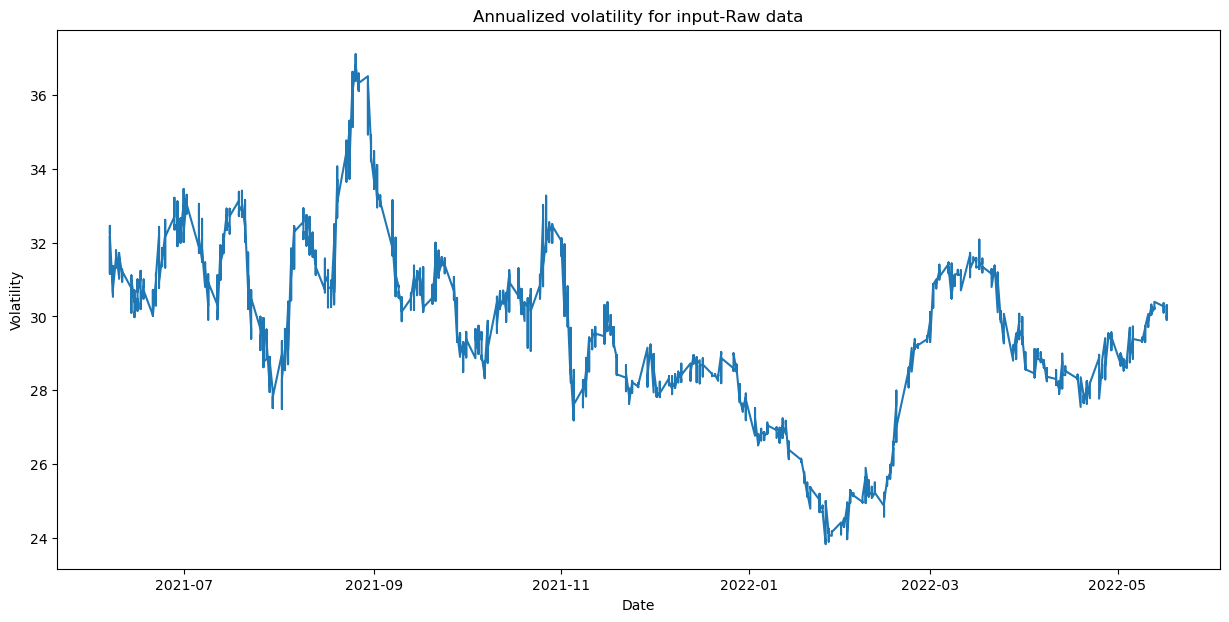

In [38]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
volatility.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility')
ax1.set_title('Annualized volatility for input-Raw data')
plt.show()

In [44]:
TRADING_DAYS = 365
returns = np.log(raw_data['Spot']/raw_data['Spot'].shift(1))
returns.fillna(0, inplace=True)
raw_data["volatility"] = returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
raw_data.tail()

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM,volatility
Date,,,,,,,,,,,,,,
2021-06-07,6/7/2021 11:41,INTC,Call,1/21/2022,57.5,56.78,4.62,7,626,291.09K,8.92K,1.23,1,32.224072
2021-06-07,6/7/2021 11:15,RKT,Call,7/16/2021,21.0,19.72,1.38,6,1.24K,188.88K,10.41K,5.34,1,32.235744
2021-06-07,6/7/2021 10:51,IRBT,Put,8/20/2021,100.0,100.62,10.35,5,692,747.48K,4.45K,0.62,1,32.276433
2021-06-07,6/7/2021 10:33,CMCSA,Put,1/20/2023,52.5,57.19,5.27,6,857,467.06K,3.49K,8.92,1,32.276629
2021-06-07,6/7/2021 9:48,SPR,Call,12/17/2021,55.0,50.94,5.40,6,406,219.40K,4.15K,8.08,0,32.251447


In [47]:
raw_data.shape

(7827, 14)

In [45]:
raw_data.describe()

,Strike,Spot,BidAsk,Orders,Diff(%),ITM,volatility
count,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7463.000000
mean,151.178342,148.595490,4.220649,7.109493,11.477625,0.679826,30.311051
std,358.668235,353.566766,5.207856,5.312003,19.367772,0.466573,2.239341
min,1.500000,1.230000,0.110000,5.000000,0.020000,0.000000,23.834975
25%,30.000000,28.270000,1.650000,5.000000,2.110000,0.000000,28.895315
50%,60.000000,58.950000,3.100000,5.000000,5.600000,1.000000,30.426720
75%,145.000000,145.160000,5.120000,7.000000,12.715000,1.000000,31.740101
max,3950.000000,3755.250000,194.350000,124.000000,277.640000,1.000000,37.097719


In [46]:
raw_data["volatility"].isnull().sum()

364

In [48]:
raw_data["volatility"].isnull().sum()/len(raw_data) * 100

4.650568544780887

#### Calculate Implied Volatility of Stock Option Using Python

In [3]:
from py_vollib.black_scholes_merton.implied_volatility import implied_volatility

In [18]:
price = 15.1
s = 113.06
k = 100.0
t = 14/365.0
r = 0.035 #3.5% 10 year treasury rate<br>
q = 0
flag = 'c'

In [19]:
iv = implied_volatility(price, s, k, t, r, q, flag)

In [20]:
iv = implied_volatility(price, s, k, t, r, q, flag)
print(iv)

0.7799898996788112


- <b>price</b>: The option's market price.
- s: The current price of the stock.
- k: The option's strike price.
- t: The time until expiration, expressed in years.
- r: The risk-free interest rate, expressed as a decimal.
- q: annualized continuous dividend rate.
- flag: A string indicating whether the option is a call option ('c') or a put option ('p').